# Load Data

In [3]:
import pandas as pd

df_jan = pd.read_csv('../../data/bicing/processed/months/2023_01_STATIONS.csv')
df_feb = pd.read_csv('../../data/bicing/processed/months/2023_02_STATIONS.csv')
df_march = pd.read_csv('../../data/bicing/processed/months/2023_03_STATIONS.csv')
df_april = pd.read_csv('../../data/bicing/processed/months/2023_04_STATIONS.csv')
df_may = pd.read_csv('../../data/bicing/processed/months/2023_05_STATIONS.csv')
df_june = pd.read_csv('../../data/bicing/processed/months/2023_06_STATIONS.csv')
df_july = pd.read_csv('../../data/bicing/processed/months/2023_07_STATIONS.csv')
df_aug = pd.read_csv('../../data/bicing/processed/months/2023_08_STATIONS.csv')
df_sep = pd.read_csv('../../data/bicing/processed/months/2023_09_STATIONS.csv')
df_oct = pd.read_csv('../../data/bicing/processed/months/2023_10_STATIONS.csv')
df_nov = pd.read_csv('../../data/bicing/processed/months/2023_11_STATIONS.csv')
df_dec = pd.read_csv('../../data/bicing/processed/months/2023_12_STATIONS.csv')




In [4]:
df_jan = df_jan[(df_jan['month'] == 1) & (df_jan['year'] == 2023)]
df_feb = df_feb[(df_feb['month'] == 2) & (df_feb['year'] == 2023)]
df_march = df_march[(df_march['month'] == 3) & (df_march['year'] == 2023)]
df_april = df_april[(df_april['month'] == 4) & (df_april['year'] == 2023)]
df_may = df_may[(df_may['month'] == 5) & (df_may['year'] == 2023)]
df_june = df_june[(df_june['month'] == 6) & (df_june['year'] == 2023)]
df_july = df_july[(df_july['month'] == 7) & (df_july['year'] == 2023)]
df_aug = df_aug[(df_aug['month'] == 8) & (df_aug['year'] == 2023)]
df_sep = df_sep[(df_sep['month'] == 9) & (df_sep['year'] == 2023)]
df_oct = df_oct[(df_oct['month'] == 10) & (df_oct['year'] == 2023)]
df_nov = df_nov[(df_nov['month'] == 11) & (df_nov['year'] == 2023)]
df_dec = df_dec[(df_dec['month'] == 12) & (df_dec['year'] == 2023)]

In [5]:
df_2023 = pd.concat([df_jan, df_feb, df_march, df_april, df_may, df_june, df_july, df_aug, df_sep, df_oct, df_nov, df_dec])
df_2023.sort_values(by=['grouped_date'], inplace=True)
df_2023.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,day,hour,grouped_minute,day_of_week,is_weekend,grouped_date,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike
3826,1,37,35,2,9,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4396,185,9,4,5,8,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4397,188,23,20,3,4,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4398,196,6,1,5,21,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4399,201,2,0,2,22,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,False,True


## ADD Weather DF

In [6]:
df_weather = pd.read_csv('../../data/weather_clean.csv')

df_weather.head(3)

,date,hour,temperature,rainfall
0,2023-01-01,0,15,0.0
1,2023-01-01,1,14,0.0
2,2023-01-01,2,14,0.0


In [7]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['day'] = df_weather['date'].dt.day.astype(int)
df_weather['month'] = df_weather['date'].dt.month.astype(int)
df_weather['year'] = df_weather['date'].dt.year.astype(int)
df_weather['hour'] = df_weather['hour'].astype(int)

In [8]:
df_2023_weather = pd.merge(df_2023, df_weather, on=['year', 'month', 'day', 'hour'], how='left')
df_2023_weather

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,...,day_of_week,is_weekend,grouped_date,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike,date,temperature,rainfall
0,1,37,35,2,9,IN_SERVICE,1,1,2023,1,...,6,1,2023-1-1 0:00,True,True,True,True,2023-01-01,15,0.0
1,185,9,4,5,8,IN_SERVICE,1,1,2023,1,...,6,1,2023-1-1 0:00,True,True,True,True,2023-01-01,15,0.0
2,188,23,20,3,4,IN_SERVICE,1,1,2023,1,...,6,1,2023-1-1 0:00,True,True,True,True,2023-01-01,15,0.0
3,196,6,1,5,21,IN_SERVICE,1,1,2023,1,...,6,1,2023-1-1 0:00,True,True,True,True,2023-01-01,15,0.0
4,201,2,0,2,22,IN_SERVICE,1,1,2023,1,...,6,1,2023-1-1 0:00,True,True,False,True,2023-01-01,15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28142039,75,2,0,2,19,IN_SERVICE,1,1,2023,9,...,5,1,2023-9-9 9:45,True,True,False,True,2023-09-09,23,0.0
28142040,76,14,10,4,16,IN_SERVICE,1,1,2023,9,...,5,1,2023-9-9 9:45,True,True,True,True,2023-09-09,23,0.0
28142041,77,5,3,2,15,IN_SERVICE,1,1,2023,9,...,5,1,2023-9-9 9:45,True,True,True,True,2023-09-09,23,0.0
28142042,79,1,1,0,16,IN_SERVICE,1,1,2023,9,...,5,1,2023-9-9 9:45,True,True,True,False,2023-09-09,23,0.0


## Add Station info

In [9]:
station_info_df = pd.read_csv('../../data/bicing/processed/2024_STATION_LOCATIONS.csv', dtype={'post_code': str})
station_info_df.head()

,station_id,lat,lon,altitude,post_code,capacity,address,district
0,1,41.397978,2.180107,16.0,08013,46,"GRAN VIA CORTS CATALANES, 760",Eixample
1,2,41.395488,2.177198,17.0,08013,29,"C/ ROGER DE FLOR, 126",Eixample
2,3,41.394156,2.181331,11.0,08013,27,"C/ NÀPOLS, 82",Eixample
3,4,41.393317,2.181248,8.0,08013,21,"C/ RIBES, 13",Eixample
4,5,41.391103,2.180176,7.0,08018,39,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",Sant Martí


In [10]:
df_2023_weather_station = pd.merge(df_2023_weather, station_info_df, on='station_id', how='left')
df_2023_weather_station.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,...,date,temperature,rainfall,lat,lon,altitude,post_code,capacity,address,district
0,1,37,35,2,9,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.397978,2.180107,16.0,08013,46.0,"GRAN VIA CORTS CATALANES, 760",Eixample
1,185,9,4,5,8,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.370372,2.138944,20.0,08014,17.0,"C/GAVÀ, 81",Sants-Montjuïc
2,188,23,20,3,4,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.375695,2.135857,30.0,08014,27.0,PG. SANT ANTONI /PL. SANTS,Sants-Montjuïc
3,196,6,1,5,21,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.383261,2.139266,38.0,08029,27.0,"C/ BERLÍN, 38",Les Corts
4,201,2,0,2,22,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.387806,2.134422,55.0,08029,24.0,"C/ NUMÀNCIA, 136",Les Corts


In [11]:
df_2023_weather_station.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available', 'status',
       'is_renting', 'is_returning', 'year', 'month', 'day', 'hour',
       'grouped_minute', 'day_of_week', 'is_weekend', 'grouped_date',
       'docking_available', 'bikes_available', 'bikes_available.mechanical',
       'bikes_available.ebike', 'date', 'temperature', 'rainfall', 'lat',
       'lon', 'altitude', 'post_code', 'capacity', 'address', 'district'],
      dtype='object')

In [107]:
columns_to_keep = ['station_id', 'num_bikes_available',
                   'num_bikes_available_types.mechanical',
                   'num_bikes_available_types.ebike', 'num_docks_available', 'status',
                   'is_renting', 'is_returning', 'day_of_week', 'is_weekend', 'grouped_date',
                   'docking_available', 'bikes_available', 'bikes_available.mechanical',
                   'bikes_available.ebike', 'temperature', 'rainfall', 'lat', 'lon', 'post_code', 'altitude', 'capacity', 'year', 'month', 'day', 'hour',
       'grouped_minute']

df_2023_ml = df_2023_weather_station[columns_to_keep]
df_2023_ml.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,day_of_week,is_weekend,...,lat,lon,post_code,altitude,capacity,year,month,day,hour,grouped_minute
0,1,37,35,2,9,IN_SERVICE,1,1,6,1,...,41.397978,2.180107,08013,16.0,46.0,2023,1,1,0,0
1,185,9,4,5,8,IN_SERVICE,1,1,6,1,...,41.370372,2.138944,08014,20.0,17.0,2023,1,1,0,0
2,188,23,20,3,4,IN_SERVICE,1,1,6,1,...,41.375695,2.135857,08014,30.0,27.0,2023,1,1,0,0
3,196,6,1,5,21,IN_SERVICE,1,1,6,1,...,41.383261,2.139266,08029,38.0,27.0,2023,1,1,0,0
4,201,2,0,2,22,IN_SERVICE,1,1,6,1,...,41.387806,2.134422,08029,55.0,24.0,2023,1,1,0,0


In [108]:
df_2023_ml.isnull().sum()

station_id                                 0
num_bikes_available                        0
num_bikes_available_types.mechanical       0
num_bikes_available_types.ebike            0
num_docks_available                        0
status                                     0
is_renting                                 0
is_returning                               0
day_of_week                                0
is_weekend                                 0
grouped_date                               0
docking_available                          0
bikes_available                            0
bikes_available.mechanical                 0
bikes_available.ebike                      0
temperature                                0
rainfall                                   0
lat                                     2664
lon                                     2664
post_code                               2664
altitude                                2664
capacity                                2664
year      

In [109]:
df_2023_ml[df_2023_ml['capacity'].isnull()]['station_id'].unique()
#Station 520 missing information
df_2023_ml = df_2023_ml[df_2023_ml['station_id'] != 520]

In [26]:
df_2023_ml.isnull().sum()

station_id                              0
num_bikes_available                     0
num_bikes_available_types.mechanical    0
num_bikes_available_types.ebike         0
num_docks_available                     0
status                                  0
is_renting                              0
is_returning                            0
day_of_week                             0
is_weekend                              0
grouped_date                            0
docking_available                       0
bikes_available                         0
bikes_available.mechanical              0
bikes_available.ebike                   0
temperature                             0
rainfall                                0
lat                                     0
lon                                     0
post_code                               0
altitude                                0
capacity                                0
dtype: int64

In [110]:
df_2023_ml['grouped_date'] = pd.to_datetime(df_2023_ml['grouped_date'])

## ADD holidays

In [111]:
# January 6 (Friday) Three Kings' Day.
# April 7 (Friday) Good Friday.
# April 10 (Monday) Easter.
# May 1 (Monday) Labor Day.
# June 24 (Saturday) Saint John's Eve.
# August 15 (Tuesday) Assumption.
# September 11 (Monday) National Day of Catalonia.
# October 12 (Thursday) National Holiday of Spain.
# November 1 (Wednesday) All Saints' Day.
# December 6 (Wednesday) Constitution Day.
# December 8 (Friday) La Immaculada.
# December 25 (Monday) Christmas.
# December 26 (Tuesday) Saint Stephen.
holidays = ['01/06/2023', '04/07/2023', '04/10/2023', '05/01/2023', '06/24/2023', '08/15/2023', '09/11/2023', '10/12/2023', '11/01/2023', '12/06/2023', '12/08/2023', '12/25/2023', '12/26/2023']
df_2023_ml['is_holiday'] = df_2023_ml['grouped_date'].isin(holidays)
df_2023_ml[df_2023_ml['is_holiday'] == True]['grouped_date']

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_6609/3050465080.py:15: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



1935575    2023-01-06
1935576    2023-01-06
1935577    2023-01-06
1935578    2023-01-06
1935579    2023-01-06
              ...    
26002052   2023-09-11
26002053   2023-09-11
26002054   2023-09-11
26002055   2023-09-11
26002056   2023-09-11
Name: grouped_date, Length: 8928, dtype: datetime64[ns]

In [114]:
df_2023_ml[(df_2023_ml['is_returning'] == True) & (df_2023_ml['num_docks_available'] == 0)]

In [35]:
df_2023_ml.corr(numeric_only=True)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_renting,is_returning,day_of_week,is_weekend,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike,temperature,rainfall,lat,lon,altitude,capacity,is_holiday
station_id,1.000000,-0.083157,-0.136803,0.070525,0.096397,0.000099,0.000090,-0.000798,-0.000374,0.039486,-0.037680,-0.164229,0.055594,-0.005573,0.000312,0.246916,-0.178512,0.389425,-0.008178,0.000379
num_bikes_available,-0.083157,1.000000,0.852851,0.480823,-0.659194,0.041087,0.041162,0.010532,0.007310,-0.207011,0.309417,0.471047,0.209604,-0.113623,-0.004985,-0.112312,0.248088,-0.317991,0.348447,0.000654
num_bikes_available_types.mechanical,-0.136803,0.852851,1.000000,-0.043506,-0.533618,-0.004040,-0.004072,0.003729,0.003121,-0.178174,0.227732,0.524467,-0.031799,-0.036278,-0.004888,-0.174763,0.330675,-0.450950,0.337996,-0.000594
num_bikes_available_types.ebike,0.070525,0.480823,-0.043506,1.000000,-0.369974,-0.009441,-0.009327,0.013631,0.008323,-0.120299,0.198245,0.015870,0.450821,-0.157405,-0.001184,0.078122,-0.079667,0.147794,0.101645,0.002226
num_docks_available,0.096397,-0.659194,-0.533618,-0.369974,1.000000,0.007029,0.006982,-0.015416,-0.015090,0.254938,-0.235735,-0.331371,-0.189626,0.022532,0.001447,0.060736,-0.189539,0.244500,0.436328,-0.000837
is_renting,0.000099,0.041087,-0.004040,-0.009441,0.007029,1.000000,0.999113,0.004249,0.006079,0.237819,0.133185,0.058784,0.059714,0.000815,-0.001520,0.002224,-0.002800,0.003081,-0.005454,0.000419
is_returning,0.000090,0.041162,-0.004072,-0.009327,0.006982,0.999113,1.000000,0.004292,0.006071,0.238038,0.133067,0.058732,0.059661,0.000847,-0.001461,0.002255,-0.002786,0.003106,-0.005458,0.000418
day_of_week,-0.000798,0.010532,0.003729,0.013631,-0.015416,0.004249,0.004292,1.000000,0.777039,-0.001346,0.007899,-0.000772,0.022708,-0.000503,-0.034334,0.000224,0.002620,-0.000814,-0.000783,-0.006803
is_weekend,-0.000374,0.007310,0.003121,0.008323,-0.015090,0.006079,0.006071,0.777039,1.000000,0.001690,0.009463,0.002180,0.019503,0.010414,-0.031900,0.001055,0.003481,-0.000526,-0.000958,-0.006661
docking_available,0.039486,-0.207011,-0.178174,-0.120299,0.254938,0.237819,0.238038,-0.001346,0.001690,1.000000,0.003153,-0.050072,-0.024495,-0.011294,0.001241,0.055963,-0.053431,0.076779,0.043692,0.000716


In [38]:
import numpy as np
import seaborn as sns
corr_np_spearman = np.triu(df_2023_ml.corr(numeric_only=True))
corr_np_spearman[corr_np_spearman == 0] = np.nan
corr_np_spearman = np.round(corr_np_spearman, 3)
corr_np_spearman

array([[ 1.   , -0.083, -0.137,  0.071,  0.096,  0.   ,  0.   , -0.001,
        -0.   ,  0.039, -0.038, -0.164,  0.056, -0.006,  0.   ,  0.247,
        -0.179,  0.389, -0.008,  0.   ],
       [   nan,  1.   ,  0.853,  0.481, -0.659,  0.041,  0.041,  0.011,
         0.007, -0.207,  0.309,  0.471,  0.21 , -0.114, -0.005, -0.112,
         0.248, -0.318,  0.348,  0.001],
       [   nan,    nan,  1.   , -0.044, -0.534, -0.004, -0.004,  0.004,
         0.003, -0.178,  0.228,  0.524, -0.032, -0.036, -0.005, -0.175,
         0.331, -0.451,  0.338, -0.001],
       [   nan,    nan,    nan,  1.   , -0.37 , -0.009, -0.009,  0.014,
         0.008, -0.12 ,  0.198,  0.016,  0.451, -0.157, -0.001,  0.078,
        -0.08 ,  0.148,  0.102,  0.002],
       [   nan,    nan,    nan,    nan,  1.   ,  0.007,  0.007, -0.015,
        -0.015,  0.255, -0.236, -0.331, -0.19 ,  0.023,  0.001,  0.061,
        -0.19 ,  0.244,  0.436, -0.001],
       [   nan,    nan,    nan,    nan,    nan,  1.   ,  0.999,  0.004,
   

<Axes: >

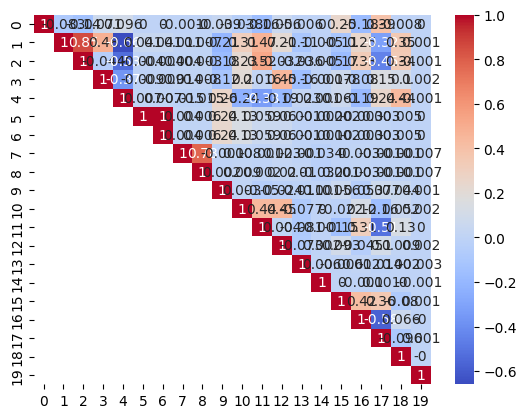

In [39]:
import seaborn as sns
sns.heatmap(corr_np_spearman, annot=True, cmap='coolwarm')

y = [docking_available,	bikes_available	,bikes_available.mechanical,	bikes_available.ebike]
df_y = df_2023_ml[y]
x_columns = [station_id	num_bikes_available	num_bikes_available_types.mechanical	num_bikes_available_types.ebike	num_docks_available	is_renting,	is_returning	day_of_week	,is_weekend,	temperature	,rainfall]
X = df

2024-07-29 14:53:18.282680: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/sol/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


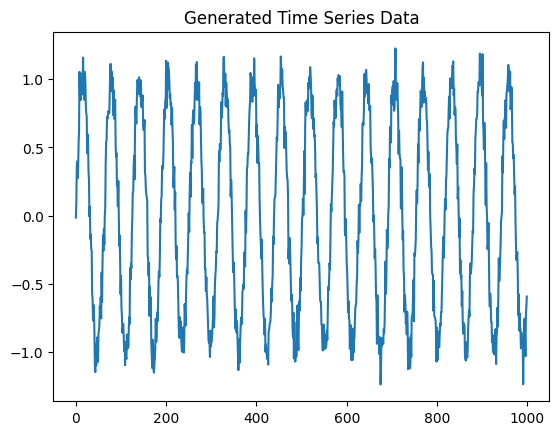

Epoch 1/200


/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5119
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1545
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0719
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0325
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0136
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0124
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0125
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0122
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131
Epoch 13/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124
Epoch 14/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0115
Epoch 15/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116
E

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate dummy time series data
def generate_time_series(length):
    time = np.arange(length)
    series = np.sin(0.1 * time) + np.random.normal(scale=0.1, size=length)
    return series

data = generate_time_series(1000)
plt.plot(data)
plt.title('Generated Time Series Data')
plt.show()

# Prepare the data
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 50
X, y = prepare_data(data, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=1)

# Make predictions
x_input = data[-n_steps:].reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=0)
print(f"Next value prediction: {yhat[0][0]}")

In [43]:
data

array([-1.49932095e-02,  1.01056193e-01,  3.60858863e-01,  3.97215174e-01,
        2.74048906e-01,  3.51490166e-01,  5.31734581e-01,  6.21430963e-01,
        1.05347769e+00,  8.90162615e-01,  1.00111098e+00,  8.47456329e-01,
        9.20587680e-01,  8.91992688e-01,  1.03921263e+00,  1.03236077e+00,
        1.15842262e+00,  8.85745765e-01,  9.61226710e-01,  8.48998939e-01,
        1.05299378e+00,  9.81839117e-01,  8.03041926e-01,  7.49694849e-01,
        7.21880898e-01,  4.57414935e-01,  5.94447370e-01,  5.31667364e-01,
        3.17349691e-01,  2.63833074e-01, -7.38451500e-03,  6.75791455e-02,
       -1.72515881e-01, -1.38312047e-01, -2.47517037e-01, -2.53863141e-01,
       -5.74957135e-01, -6.11292517e-01, -7.70568581e-01, -6.55607485e-01,
       -6.98722973e-01, -8.43890640e-01, -1.09267847e+00, -1.14854499e+00,
       -9.54615081e-01, -1.09987892e+00, -9.34163581e-01, -1.01880355e+00,
       -8.90774969e-01, -1.07347019e+00, -8.74306743e-01, -8.39913112e-01,
       -8.03356004e-01, -

In [18]:
df_2023_ml.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available', 'status',
       'is_renting', 'is_returning', 'day_of_week', 'is_weekend',
       'grouped_date', 'docking_available', 'bikes_available',
       'bikes_available.mechanical', 'bikes_available.ebike', 'temperature',
       'rainfall', 'lat', 'lon', 'post_code', 'altitude', 'capacity',
       'is_holiday'],
      dtype='object')

### Add Season

In [22]:
df_2023_ml['season'] = df_2023_ml['grouped_date'].dt.month.apply(lambda x: 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn' if x in [9, 10, 11] else 'Winter')
df_2023_ml.head(4)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,day_of_week,is_weekend,...,bikes_available.ebike,temperature,rainfall,lat,lon,post_code,altitude,capacity,is_holiday,season
0,1,37,35,2,9,IN_SERVICE,1,1,6,1,...,True,15,0.0,41.397978,2.180107,08013,16.0,46.0,False,Winter
1,185,9,4,5,8,IN_SERVICE,1,1,6,1,...,True,15,0.0,41.370372,2.138944,08014,20.0,17.0,False,Winter
2,188,23,20,3,4,IN_SERVICE,1,1,6,1,...,True,15,0.0,41.375695,2.135857,08014,30.0,27.0,False,Winter
3,196,6,1,5,21,IN_SERVICE,1,1,6,1,...,True,15,0.0,41.383261,2.139266,08029,38.0,27.0,False,Winter


In [99]:
filter_stations = [57, 32, 31, 378, 446]
#filter_stations = [57]
df_a = df_2023_ml[df_2023_ml['station_id'].isin(filter_stations)].copy()
df_a

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,day_of_week,is_weekend,...,bikes_available.ebike,temperature,rainfall,lat,lon,post_code,altitude,capacity,is_holiday,season
72,378,19,18,1,1,IN_SERVICE,1,1,6,1,...,True,15,0.0,41.378538,2.176743,08002,5.0,21.0,False,Winter
276,446,11,11,0,3,IN_SERVICE,1,1,6,1,...,False,15,0.0,41.377997,2.188423,08003,4.0,15.0,False,Winter
308,378,20,20,0,1,IN_SERVICE,1,1,6,1,...,False,15,0.0,41.378538,2.176743,08002,5.0,21.0,False,Winter
363,446,10,10,0,4,IN_SERVICE,1,1,6,1,...,False,15,0.0,41.377997,2.188423,08003,4.0,15.0,False,Winter
431,446,11,10,1,3,IN_SERVICE,1,1,6,1,...,True,15,0.0,41.377997,2.188423,08003,4.0,15.0,False,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28141495,446,12,12,0,1,IN_SERVICE,1,1,5,1,...,False,23,0.0,41.377997,2.188423,08003,4.0,15.0,False,Autumn
28141608,57,23,23,0,1,IN_SERVICE,1,1,5,1,...,False,23,0.0,41.377187,2.176757,08002,4.0,25.0,False,Autumn
28141701,446,11,10,1,2,IN_SERVICE,1,1,5,1,...,True,23,0.0,41.377997,2.188423,08003,4.0,15.0,False,Autumn
28141979,31,13,12,1,0,IN_SERVICE,1,1,5,1,...,True,23,0.0,41.374800,2.188905,08003,4.0,18.0,False,Autumn


In [95]:
df_a.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available', 'status',
       'is_renting', 'is_returning', 'day_of_week', 'is_weekend',
       'grouped_date', 'docking_available', 'bikes_available',
       'bikes_available.mechanical', 'bikes_available.ebike', 'temperature',
       'rainfall', 'lat', 'lon', 'post_code', 'altitude', 'capacity',
       'is_holiday', 'season', 'usage'],
      dtype='object')

In [75]:
df_a['usage'] = df_a['bikes_available'].diff() 

# SVM

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

df_svm = df_a.copy()
# Select features and target
# df_svm['hour'] = df_svm['grouped_date'].dt.hour
# df_svm['day_of_week'] = df_svm['grouped_date'].dt.dayofweek
# df_svm['month'] = df_svm['grouped_date'].dt.month


features = ['station_id', 'day_of_week', 'grouped_date', 'temperature', 'rainfall', 'capacity', 'is_holiday','season']
target = 'docking_available'  # or 'bikes_available'

X = df_svm[features]

y = df_svm[target]


X['grouped_date'] = X['grouped_date'].astype('int64')
X = pd.get_dummies(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SVM
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred)
conf_matrix_rbf = confusion_matrix(y_test, y_pred)
class_report_rbf = classification_report(y_test, y_pred)
roc_auc_rbf = roc_auc_score(y_test, y_prob)


# Display results
print("Accuracy:", accuracy_rbf)
print("Confusion Matrix:\n", conf_matrix_rbf)
print("Classification Report:\n", class_report_rbf)
print("ROC AUC Score:", roc_auc_rbf)

# Compute ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC', roc_auc)



/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_6609/588265660.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyboardInterrupt: 

ROC AUC 0.5111314459190075


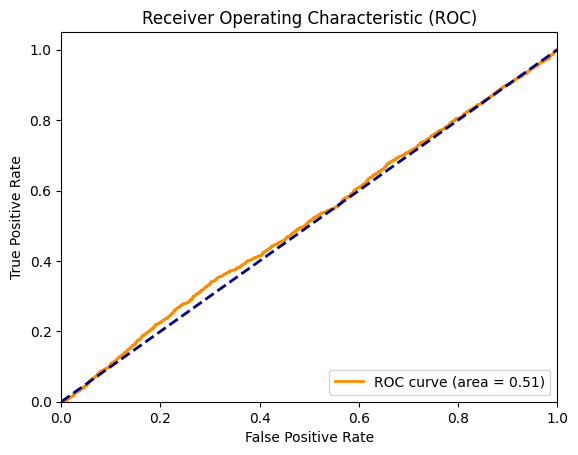

In [68]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC', roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# XGBOOST

In [86]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

df = df_a.copy()
# Convert 'grouped_date' to datetime
df['grouped_date'] = pd.to_datetime(df['grouped_date'])
df['hour'] = df['grouped_date'].dt.hour
df['minute'] = df['grouped_date'].dt.minute
df['day'] = df['grouped_date'].dt.day
df['day_of_week'] = df['grouped_date'].dt.dayofweek
df['month'] = df['grouped_date'].dt.month

# Sort by date
df = df.sort_values('grouped_date')
df['grouped_date'] = df['grouped_date'].astype('int64')
# Drop rows with NaN values
df = df.dropna()

# Select features and target
features = ['hour', 'day_of_week', 'month','day','minute' ,'grouped_date','temperature', 'rainfall', 'capacity', 'is_holiday', 'season', 'altitude']
target = 'docking_available'  # or 'bikes_available'

X = df[features]
y = df[target]

X = pd.get_dummies(X)


    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# XGBoost Regressor
#model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, enable_categorical=True)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')
# XGBoost Regressor with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.35923272371292114
Accuracy: -0.05957035231089258
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mean Absolute Error: 0.38407641649246216


# Random Forest

In [106]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


df_rf = df_a.copy()

# Select features and target
#features = [ 'day_of_week', 'grouped_date', 'temperature', 'rainfall', 'capacity', 'is_holiday', 'season','altitude','station_id','is_weekend']
features = [ 'day_of_week', 'year','month', 'day','hour','grouped_minute', 'temperature', 'rainfall', 'capacity', 'is_holiday', 'season','altitude','station_id','is_weekend', 'is_returning']
target = 'docking_available'  # or 'bikes_available'

X = df_rf[features]
y= df_rf[target]
# Convert datetime column to numerical representation
#X['grouped_date'] = X['grouped_date'].astype(int)

# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X)


# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
#Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
model = RandomForestClassifier(n_estimators=300,max_depth=30,min_samples_leaf=1, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


KeyError: "['year', 'month', 'day', 'hour', 'grouped_minute'] not in index"

ROC AUC 0.8724925131854129


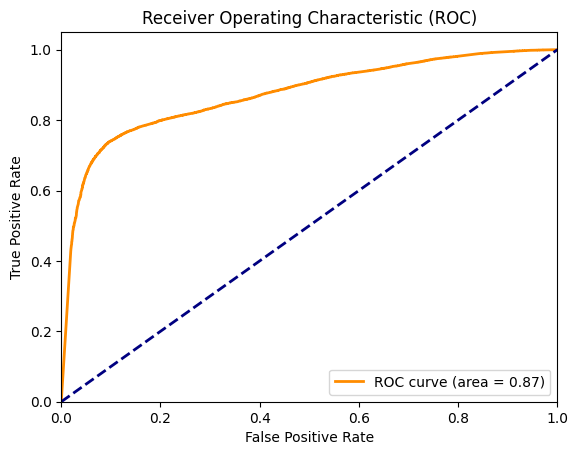

In [102]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC', roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [56]:
# Import necessary libraries for pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_f', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Display the pipeline
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_f', RandomForestClassifier(random_state=42))])

# GRidSearch

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation AUC Score: 0.8840587982533863
Test Accuracy: 0.8095434827514977
Confusion Matrix:
 [[1559  979]
 [ 865 6279]]
Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.61      0.63      2538
        True       0.87      0.88      0.87      7144

    accuracy                           0.81      9682
   macro avg       0.75      0.75      0.75      9682
weighted avg       0.81      0.81      0.81      9682

Test ROC AUC Score: 0.8872547965217605


NameError: name 'plot_decision_boundary' is not defined

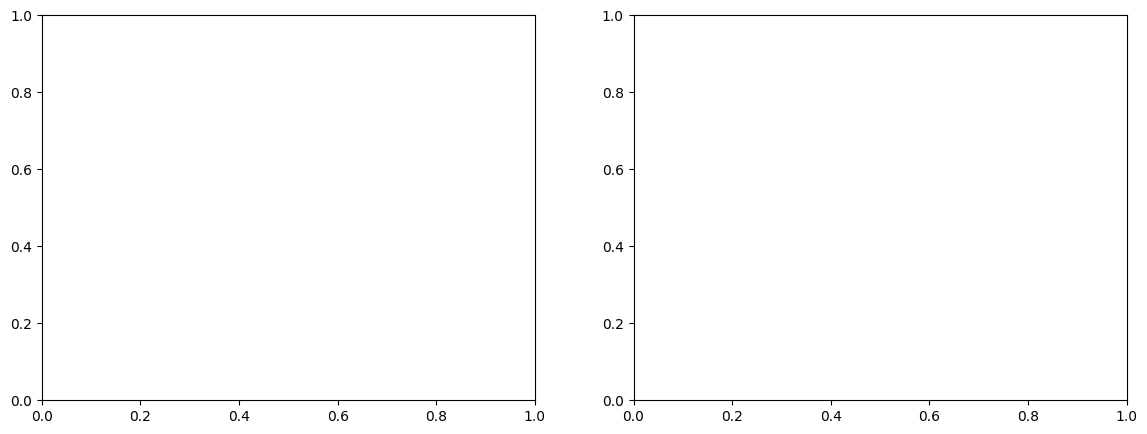

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300],
    'max_depth': [30,40],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}

# Perform GridSearchCV


grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

# Display results
print("Best Parameters:", best_params)
print("Best Cross-Validation AUC Score:", best_score)
print("Test Accuracy:", accuracy_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)
print("Test ROC AUC Score:", roc_auc_best)



```
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation AUC Score: 0.8840587982533863
Test Accuracy: 0.8095434827514977
Confusion Matrix:
 [[1559  979]
 [ 865 6279]]
Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.61      0.63      2538
        True       0.87      0.88      0.87      7144

    accuracy                           0.81      9682
   macro avg       0.75      0.75      0.75      9682
weighted avg       0.81      0.81      0.81      9682

Test ROC AUC Score: 0.8872547965217605
```

ROC AUC 0.8793824075618351


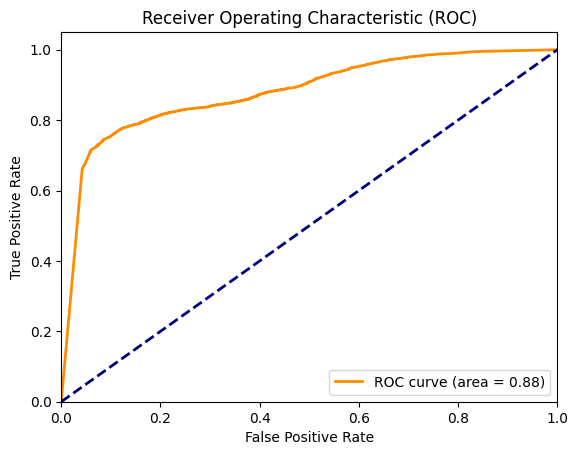

In [93]:
# Plot Roc Curve
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC', roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [103]:
# Import necessary libraries for cross-validation and pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



# Perform cross-validation using an appropriate classification scoring metric
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
# Convert scores to positive and calculate mean and standard deviation
mse_scores = -cv_scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Display the cross-validation scores
print(f"Cross-Validation MSE Scores: {mse_scores}")
print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

# Print the cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {mean_cv_score}")
print(f"Standard Deviation of Accuracy: {std_cv_score}")

Cross-Validation MSE Scores: [-0.84871337 -0.84780931 -0.84963948 -0.84690525 -0.85036714]
Mean MSE: -0.8486869087781967
Standard Deviation of MSE: 0.001239011061223462
Cross-Validation Accuracy Scores: [0.84871337 0.84780931 0.84963948 0.84690525 0.85036714]
Mean Accuracy: 0.8486869087781967
Standard Deviation of Accuracy: 0.001239011061223462


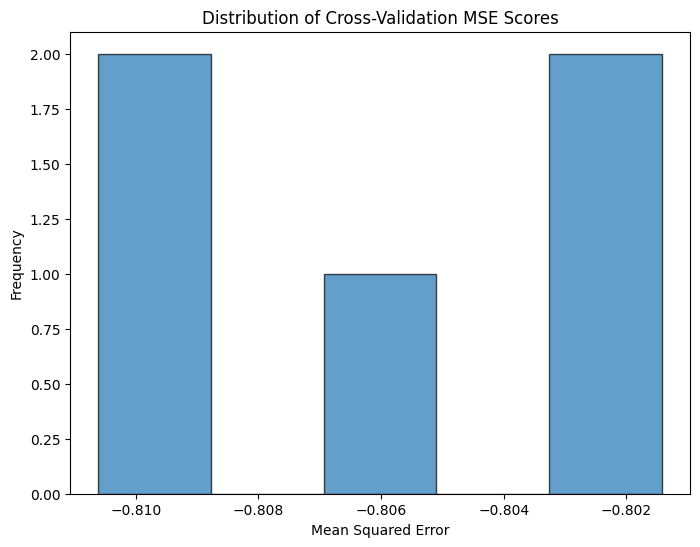

In [54]:
# Visualize the cross-validation results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(mse_scores, bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Cross-Validation MSE Scores')
plt.show()

In [55]:
import plotly.express as px
fig = px.imshow(conf_matrix, text_auto=True,labels=dict(x="Predicted", y="True", color="Count"))

fig.show()

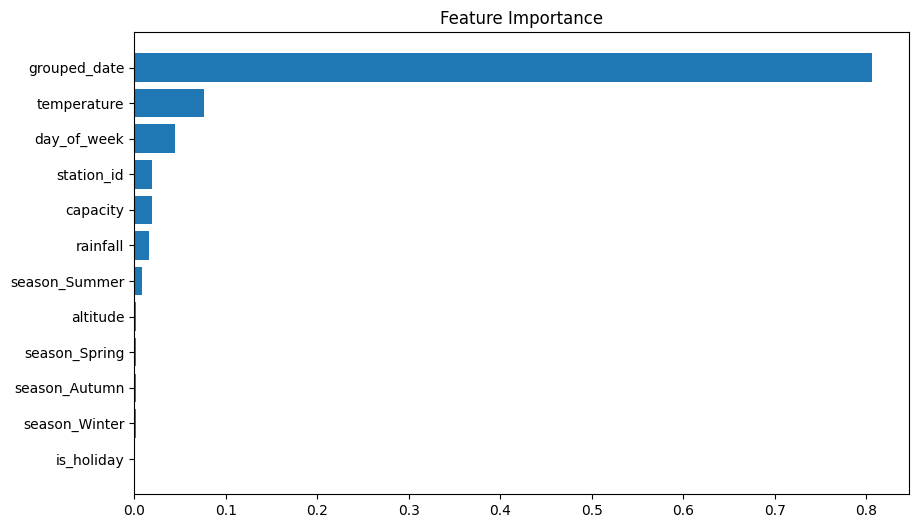

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), names)
plt.gca().invert_yaxis()
plt.show()